# Diamonds Project.

## Context

![](diamantes.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

### 1. Import Libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 2. Import the csv files and taking the first look at the data.

In [175]:
diamonds = pd.read_csv('diamonds.csv')
diamonds_rick = pd.read_csv('rick_diamonds.csv')

In [176]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [178]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [180]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [203]:
diamonds.corr().style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000


## Tratando os dados

In [182]:
X = diamonds[['cut', 'clarity', 'color']]
y = diamonds['price']

In [184]:
pd.get_dummies(X).head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [185]:
X=pd.get_dummies(X, drop_first=True)

In [6]:
X

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
48936,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
48937,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
48938,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [186]:
pd.options.display.max_columns = 100

In [200]:
diamonds_dummies = pd.concat([diamonds, X], axis = 1)
diamonds_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          48940 non-null  float64
 1   cut            48940 non-null  object 
 2   color          48940 non-null  object 
 3   clarity        48940 non-null  object 
 4   depth          48940 non-null  float64
 5   table          48940 non-null  float64
 6   price          48940 non-null  int64  
 7   x              48940 non-null  float64
 8   y              48940 non-null  float64
 9   z              48940 non-null  float64
 10  cut_Good       48940 non-null  uint8  
 11  cut_Ideal      48940 non-null  uint8  
 12  cut_Premium    48940 non-null  uint8  
 13  cut_Very Good  48940 non-null  uint8  
 14  clarity_IF     48940 non-null  uint8  
 15  clarity_SI1    48940 non-null  uint8  
 16  clarity_SI2    48940 non-null  uint8  
 17  clarity_VS1    48940 non-null  uint8  
 18  clarit

In [202]:
diamonds_dummies.corr().style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824,0.037306,-0.164638,0.115596,0.010372,-0.113142,0.064434,0.268628,-0.064722,-0.038169,-0.167835,-0.138397,-0.137802,-0.060171,-0.030127,0.100892,0.163835,0.180966
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344,0.136848,-0.023624,-0.197739,0.024040,-0.032308,0.040914,0.006776,-0.024834,-0.008627,-0.022121,-0.019422,-0.029986,-0.016223,0.001890,0.024447,0.023564,0.022306
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646,0.173300,-0.548848,0.338505,0.121307,-0.079601,0.052193,0.095487,-0.027526,-0.009255,-0.069803,-0.060638,0.008305,-0.006350,-0.037042,0.012838,0.017762,0.036408
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247,0.002786,-0.098118,0.095097,0.006614,-0.049060,0.010214,0.129935,-0.011797,-0.001006,-0.095525,-0.053609,-0.099419,-0.024662,0.007321,0.058088,0.099148,0.082581
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336,0.033834,-0.163658,0.125993,0.005157,-0.124397,0.081298,0.271460,-0.061117,-0.035099,-0.185525,-0.148549,-0.132834,-0.047703,-0.025547,0.094291,0.148460,0.165346
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768,0.035379,-0.153724,0.107003,0.017159,-0.118898,0.077719,0.263262,-0.057287,-0.035445,-0.179132,-0.142763,-0.128500,-0.046351,-0.025427,0.091875,0.144357,0.161191
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000,0.048458,-0.159432,0.089091,0.016484,-0.123620,0.082694,0.263129,-0.059187,-0.035944,-0.182269,-0.146009,-0.130691,-0.048316,-0.025642,0.093151,0.147041,0.164723
cut_Good,0.037306,0.136848,0.173300,0.002786,0.033834,0.035379,0.048458,1.000000,-0.258356,-0.185141,-0.169367,-0.033238,0.055288,0.042599,-0.016879,-0.019342,-0.036619,-0.040268,0.007539,0.005861,-0.023722,-0.009199,0.005966,0.014558
cut_Ideal,-0.164638,-0.023624,-0.548848,-0.098118,-0.163658,-0.153724,-0.159432,-0.258356,1.000000,-0.479043,-0.438230,0.105511,-0.084489,-0.108435,0.034421,0.015195,0.090097,0.075470,-0.001234,0.000562,0.032797,-0.020642,-0.008871,-0.038283
cut_Premium,0.115596,-0.197739,0.338505,0.095097,0.125993,0.107003,0.089091,-0.185141,-0.479043,1.000000,-0.314040,-0.053849,0.025411,0.067272,-0.014691,0.023688,-0.056757,-0.059757,-0.017943,-0.011953,0.004723,0.027712,0.006808,0.016025


In [194]:
X_r = diamonds_rick[['cut', 'clarity', 'color']]
y = diamonds['price']

In [196]:
pd.get_dummies(X_r).head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4996,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4997,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4998,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [215]:
diamonds_dummies.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [219]:
model = LinearRegression()

X = diamonds_dummies[['carat', 'depth', 'table', 'x', 'y',
       'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J']]
y = diamonds_dummies['price']

model.fit(X, y)

LinearRegression()

In [220]:
model.coef_

array([ 1.12884762e+04, -6.51224562e+01, -2.56129349e+01, -1.02008175e+03,
        3.99048870e+00, -4.23245676e+01,  5.51647461e+02,  8.13847912e+02,
        7.39756470e+02,  7.01508542e+02,  5.32529975e+03,  3.65104741e+03,
        2.68867331e+03,  4.56208834e+03,  4.25363444e+03,  4.99384291e+03,
        4.93604237e+03, -2.06132091e+02, -2.74652811e+02, -4.83528588e+02,
       -9.74334457e+02, -1.47162263e+03, -2.37934918e+03])

In [221]:
model.intercept_

2298.080266170203

In [222]:
y_observed = diamonds_dummies['price']
y_predicted = model.predict(diamonds_dummies[['carat', 'depth', 'table', 'x', 'y',
       'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J']])

In [227]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [228]:
rmse = sqrt(mean_squared_error(y_observed, y_predicted))
rmse

1125.2756226826166

In [230]:
r2_score(y_observed, y_predicted)

0.9204342924671967

C:\Users\Solange Kamiya\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Solange Kamiya\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Solange Kamiya\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

<AxesSubplot:xlabel='z', ylabel='price'>

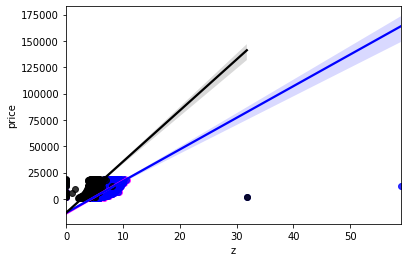

In [231]:
sns.regplot(diamonds_dummies['x'], diamonds_dummies['price'], color='magenta')
sns.regplot(diamonds_dummies['y'], diamonds_dummies['price'], color='blue')
sns.regplot(diamonds_dummies['z'], diamonds_dummies['price'], color='k')

## Teste do dummies do diamonds rick

In [197]:
X_r=pd.get_dummies(X_r, drop_first=True)

In [198]:
diamonds_rick_dummies = pd.concat([diamonds_rick, X_r], axis = 1)
diamonds_rick_dummies

,carat,cut,color,clarity,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [199]:
diamonds_dummies.corr()['price']

carat            0.922186
depth           -0.012037
table            0.127832
price            1.000000
x                0.885019
y                0.864059
z                0.860247
cut_Good         0.002786
cut_Ideal       -0.098118
cut_Premium      0.095097
cut_Very Good    0.006614
clarity_IF      -0.049060
clarity_SI1      0.010214
clarity_SI2      0.129935
clarity_VS1     -0.011797
clarity_VS2     -0.001006
clarity_VVS1    -0.095525
clarity_VVS2    -0.053609
color_E         -0.099419
color_F         -0.024662
color_G          0.007321
color_H          0.058088
color_I          0.099148
color_J          0.082581
Name: price, dtype: float64

In [20]:
diamonds_maior.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
59,0.42,Premium,I,SI2,61.5,59.0,552,4.78,4.84,2.96
84,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52
85,0.70,Ideal,G,VS2,61.6,56.0,2757,5.70,5.67,3.50
86,0.71,Very Good,E,VS2,62.4,57.0,2759,5.68,5.73,3.56
87,0.78,Very Good,G,SI2,63.8,56.0,2759,5.81,5.85,3.72


In [109]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [232]:
model = LinearRegression()

X = diamonds_dummies[['carat','x','y','z',  'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J']]
y = diamonds_dummies['price']

model.fit(X, y)

LinearRegression()

In [234]:
model.coef_

array([11156.26624935,  -879.96118973,    25.37275544,  -216.71545071,
         646.57242722,  1010.6900408 ,   890.45574984,   845.40336685,
        5369.11556706,  3665.08873959,  2707.15547679,  4588.59712549,
        4274.12164746,  5026.57140095,  4964.74643156,  -205.6452651 ,
        -275.46528959,  -487.88175076,  -980.32064136, -1477.84345893,
       -2384.79552806])

In [236]:
rmse = sqrt(mean_squared_error(y_observed, y_predicted))
rmse

1125.2756226826166

## Teste para ver o erro

In [171]:
y_observed = diamonds_dummies['price']
results = model.predict(diamonds_rick_dummies[['carat', 'x', 'y', 'z',  'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J' ]])                             
       

In [240]:
diamonds_rick['price_predicted'] = pd.Series(results)

In [173]:
diamonds_rick.to_csv('teste.csv')

In [163]:
diamonds_rick.head()

,carat,cut,color,clarity,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,color_E,color_F,color_G,color_H,color_I,color_J,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,2740.568706
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,118.787407
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,914.867057
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,7500.266054
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,16791.300087


In [107]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J'],
      dtype='object')

In [241]:
model = LinearRegression()

X = diamonds_rick[['carat']]
y = diamonds_rick['price_predicted']

model.fit(X, y)

LinearRegression()

In [243]:
y_observed = diamonds_rick['price_predicted']
y_predicted = model.predict(X)

In [245]:
rmse = sqrt(mean_squared_error(y_observed, y_predicted))
rmse

1048.7738689308778

In [246]:
r2_score(y_observed, y_predicted)

0.9253024636941327

In [82]:
from sklearn.metrics import mean_squared_error

In [85]:
from sklearn.metrics import r2_score

C:\Users\Solange Kamiya\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price_predicted'>

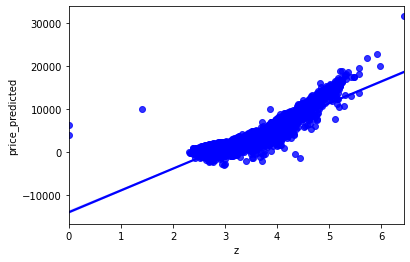

In [252]:
sns.regplot(diamonds_rick['z'], diamonds_rick['price_predicted'], color='blue')

In [253]:
diamonds_rick.describe()

,carat,depth,table,x,y,z,price_predicted
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.799144,61.724680,57.516140,5.735516,5.736410,3.539576,3907.996866
std,0.472936,1.457691,2.244019,1.120300,1.110345,0.694733,3837.709991
min,0.200000,44.000000,50.000000,0.000000,0.000000,0.000000,-3147.485606
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000,986.897569
50%,0.710000,61.800000,57.000000,5.710000,5.720000,3.530000,2822.102610
75%,1.040000,62.500000,59.000000,6.530000,6.520000,4.032500,5868.491601
max,4.130000,73.600000,70.000000,10.000000,9.850000,6.430000,31546.772585


In [254]:
diamonds_rick.to_csv('diamonds_rick.csv')

## Your root mean squared error is 1188.7113657987454